In [105]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import Recall
from tensorflow.keras.metrics import Recall, FalseNegatives, Precision, AUC, Accuracy
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

**1. Data Loading**

In [106]:
df = pd.read_csv('ex4_data.csv')
df

,INTENSIVE,NEWSITEID,RISK10YRS,INCLUSIONFRS,SBP,DBP,N_AGENTS,NOAGENTS,SMOKE_3CAT,ASPIRIN,...,RACE4,CHR,GLUR,HDL,TRR,UMALCR,BMI,STATIN,SBPTERTILE,EVENT_PRIMARY
0,Regular,74.0,29.732061,True,145,80,2,False,3,True,...,WHITE,155,81,36,92,5.80,33.115201,True,3,False
1,Regular,8.0,29.677619,True,138,71,1,False,2,True,...,WHITE,243,107,61,188,5.45,28.842380,True,2,False
2,Intensive,25.0,17.443819,True,143,92,2,False,2,False,...,WHITE,180,116,47,125,13.33,33.643060,False,2,False
3,Regular,96.0,8.627849,False,123,68,2,False,1,False,...,WHITE,234,93,89,109,6.12,29.337871,False,1,False
4,Intensive,42.0,23.751437,True,126,51,2,False,2,False,...,WHITE,126,108,39,84,28.78,36.660286,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,Regular,102.0,10.896486,False,138,59,2,False,2,True,...,WHITE,199,90,85,74,12.73,27.186534,True,2,False
8742,Regular,98.0,8.646088,False,119,73,3,False,2,False,...,WHITE,145,83,52,95,440.38,42.191997,True,1,False
8743,Regular,99.0,24.191491,True,137,75,0,True,2,False,...,WHITE,167,80,46,75,26.92,19.462021,True,2,False
8744,Intensive,15.0,20.354619,True,154,93,0,True,2,True,...,WHITE,245,103,37,369,3.20,35.579436,False,3,False


Convert boolean variables to integers

In [107]:
bool_cols=["INCLUSIONFRS","NOAGENTS","ASPIRIN","SUB_CKD","RACE_BLACK","FEMALE","SUB_CVD","SUB_CLINICALCVD","SUB_SUBCLINICALCVD","SUB_SENIOR","STATIN","EVENT_PRIMARY"]

for i in bool_cols:
  df[i]=df[i].astype(int)


 Convert categorical variables to integers

In [108]:
cat = pd.Categorical(df['INTENSIVE'])
df['INTENSIVE']=cat
df['INTENSIVE'] = df.INTENSIVE.cat.codes
cat = pd.Categorical(df['RACE4'])
df['RACE4']=cat
df['RACE4'] = df.RACE4.cat.codes

Replacing null values with the average of each column

In [109]:
df = df.apply(lambda x: x.fillna(x.mean())) 
df

,INTENSIVE,NEWSITEID,RISK10YRS,INCLUSIONFRS,SBP,DBP,N_AGENTS,NOAGENTS,SMOKE_3CAT,ASPIRIN,...,RACE4,CHR,GLUR,HDL,TRR,UMALCR,BMI,STATIN,SBPTERTILE,EVENT_PRIMARY
0,1,74.0,29.732061,1,145,80,2,0,3,1,...,3,155,81,36,92,5.80,33.115201,1,3,0
1,1,8.0,29.677619,1,138,71,1,0,2,1,...,3,243,107,61,188,5.45,28.842380,1,2,0
2,0,25.0,17.443819,1,143,92,2,0,2,0,...,3,180,116,47,125,13.33,33.643060,0,2,0
3,1,96.0,8.627849,0,123,68,2,0,1,0,...,3,234,93,89,109,6.12,29.337871,0,1,0
4,0,42.0,23.751437,1,126,51,2,0,2,0,...,3,126,108,39,84,28.78,36.660286,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8741,1,102.0,10.896486,0,138,59,2,0,2,1,...,3,199,90,85,74,12.73,27.186534,1,2,0
8742,1,98.0,8.646088,0,119,73,3,0,2,0,...,3,145,83,52,95,440.38,42.191997,1,1,0
8743,1,99.0,24.191491,1,137,75,0,1,2,0,...,3,167,80,46,75,26.92,19.462021,1,2,0
8744,0,15.0,20.354619,1,154,93,0,1,2,1,...,3,245,103,37,369,3.20,35.579436,0,3,0


Separate the column we want to predict

In [110]:
Y = df['EVENT_PRIMARY']
df=df.drop(columns=['EVENT_PRIMARY'])

Data normalization

In [111]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

Split to train and test

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=1/3, random_state=1, stratify=Y)

**2. Models**

**Linear classifier model: Logistic Regression**

This model uses a regression method to solve binary classification problems using a logistic function.

We chose this model because it solves binary classification problems and our target column "EVENT_PRIMARY" is binary. In addition, in this dataset, there are many more cases of 'false' (0) than 'true'(1) in our target column. Therefore, we need to balance it. In Logistic Regression there is a 'class_weight' parameter that increases the 'class_weight' of class 0 relative to class 1.

In [113]:
clf = LogisticRegression()

parameters = {'class_weight': ['balanced'],
              'max_iter':[100,500, 1000] ,
              'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C':[0.001,0.09,1,5,10]
              }
              
# Type of scoring used to compare parameter combinations: Recall
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters,scoring=scorer, return_train_score=True)
grid_obj = grid_obj.fit(X_train, y_train)



In [114]:
grid_obj.best_params_

{'C': 0.001,
 'class_weight': 'balanced',
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [115]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_
 
clf.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', solver='liblinear')

In [116]:
def scores(test, predict):
  d = {}
  d['Accuracy'] = accuracy_score(test, predict)
  d['Recall'] = recall_score(test, predict)
  d['Precision'] = precision_score(test, predict)
  d['ROC AUC'] = roc_auc_score(test, predict)

  return d

In [117]:
LR_scores = scores(y_test, clf.predict(X_test))
LR_scores_train = scores(y_train, clf.predict(X_train))

Does the model overfit?

In [118]:
print('Testing Error: '+str(1-accuracy_score(y_test, clf.predict(X_test))))
print('Train Error: '+str(1-accuracy_score(y_train, clf.predict(X_train))))

print('Test Scores'+str(LR_scores))
print('Train Scores'+str(LR_scores_train))

Testing Error: 0.36213991769547327
Train Error: 0.36535162950257294
Test Scores{'Accuracy': 0.6378600823045267, 'Recall': 0.6555555555555556, 'Precision': 0.10611510791366907, 'ROC AUC': 0.646125730994152}
Train Scores{'Accuracy': 0.6346483704974271, 'Recall': 0.6852367688022284, 'Precision': 0.10870525850640743, 'ROC AUC': 0.6582827967571734}


Overfitting may have occurred if the testing error is greater than the training error.

In our model, the testing error and the training error are close.
In addition, for each evaluation method, the training score is close to the test score. Therefore, the model doesn't overfit.

**Ensemble model: Random Forest Classifier**

This model is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

For classification tasks, the output of the random forest is the class selected by most trees.

We chose this model because in this dataset there are many more cases of 'false' (0) than 'true'(1) in the target column, therefore we need to balance it. In the Random Forest model, there is a 'class_weight' parameter that increases the 'class_weight' of class 0 relative to class 1.


In [119]:
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 7, 9],
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8],
               'class_weight': ['balanced']}

# Type of scoring used to compare parameter combinations: Recall
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters,scoring=scorer, return_train_score=True)
grid_obj = grid_obj.fit(X_train, y_train)
print(grid_obj.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 4}


In [120]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=4)

In [121]:
RF_scores = scores(y_test, clf.predict(X_test))
RF_scores_train = scores(y_train, clf.predict(X_train))

Does the model overfit?

In [122]:
print('Test Error: '+str(1-accuracy_score(y_test, clf.predict(X_test))))
print('Train Error: '+str(1-accuracy_score(y_train, clf.predict(X_train))))
print('Test Scores'+str(RF_scores))
print('Train Scores'+str(RF_scores_train))

Test Error: 0.35288065843621397
Train Error: 0.3423670668953688
Test Scores{'Accuracy': 0.647119341563786, 'Recall': 0.5666666666666667, 'Precision': 0.09686609686609686, 'ROC AUC': 0.6095394736842105}
Train Scores{'Accuracy': 0.6576329331046312, 'Recall': 0.5598885793871866, 'Precision': 0.09857773418342325, 'ROC AUC': 0.6119676857820597}


Overfitting may have occurred if the testing error is greater than the training error.

In our model, the testing error and the training error are close. In addition, for each evaluation method, the training score is close to the test score. Therefore, the model doesn't overfit.

**Deep Learning model: Sequential**

This model is a fully connected neuron network that consists of at least three layers: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

We chose this model because it solves binary classification problems and our target column "EVENT_PRIMARY" is binary. In addition, in this model, we got better results than in other models.


In [123]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [124]:
tf.keras.backend.clear_session()
# define the Sequential model
model = Sequential()
model.add(Dense(12, input_dim=29, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile the Sequential model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall(), Precision(), AUC()])

# fit the Sequential model on the dataset
history = model.fit(x=X_train, y=y_train1, batch_size=10, epochs=30, validation_split=1/3,  workers=-1)

Epoch 1/30
389/389 [==============================] - 3s 4ms/step - loss: 0.3576 - accuracy: 0.9156 - recall: 0.9156 - precision: 0.9156 - auc: 0.9368 - val_loss: 0.2456 - val_accuracy: 0.9372 - val_recall: 0.9372 - val_precision: 0.9372 - val_auc: 0.9390
Epoch 2/30
389/389 [==============================] - 1s 3ms/step - loss: 0.2542 - accuracy: 0.9390 - recall: 0.9390 - precision: 0.9390 - auc: 0.9432 - val_loss: 0.2318 - val_accuracy: 0.9372 - val_recall: 0.9372 - val_precision: 0.9372 - val_auc: 0.9476
Epoch 3/30
389/389 [==============================] - 1s 3ms/step - loss: 0.2355 - accuracy: 0.9390 - recall: 0.9390 - precision: 0.9390 - auc: 0.9496 - val_loss: 0.2273 - val_accuracy: 0.9372 - val_recall: 0.9372 - val_precision: 0.9372 - val_auc: 0.9515
Epoch 4/30
389/389 [==============================] - 1s 3ms/step - loss: 0.2273 - accuracy: 0.9390 - recall: 0.9390 - precision: 0.9390 - auc: 0.9537 - val_loss: 0.2244 - val_accuracy: 0.9372 - val_recall: 0.9372 - val_precision: 0

In [125]:
test_scores = model.evaluate(X_test, y_test1, verbose=0)[1:]
train_scores = model.evaluate(X_train, y_train1, verbose=0)[1:]

Does the model overfit?

In [126]:
print('Testing Error: '+str(1-test_scores[0]))
print('Train Error: '+str(1-train_scores[0]))

print('Test Scores'+str(test_scores))
print('Train Scores'+str(train_scores))

Testing Error: 0.06172841787338257
Train Error: 0.06157803535461426
Test Scores[0.9382715821266174, 0.9382715821266174, 0.9382715821266174, 0.9535638093948364]
Train Scores[0.9384219646453857, 0.9384219646453857, 0.9384219646453857, 0.9673780202865601]


Overfitting may have occurred if the testing error is greater than the training error.

In our model, the testing error and the training error are close. In addition, for each evaluation method the training score is close to the test score. Therefore, the model doesn't overfit.

**In the DL model, what's the effect of batch size? In general, and do you see this effect in the current task?**

Batch size controls the accuracy of the estimated error of the gradient while training neural networks. On one hand, a small batch size can converge faster than a large batch size, but a large batch size can reach optimum minima that a small batch size cannot reach. However, a large batch size will lead to poor generalization. Also, a small batch size can have a significant regularization effect because of its high variance, but it will require a small learning rate to prevent it from overshooting the minima.

We saw this effect in this task when we were fine-tuning the model parameters- When the batch size was very large(10,000 samples) we got worse results. When the batch size was very small(1 sample) the runtime of all the epochs was very long, but we already got good results in the first epochs (rapid convergence). When the batch size was around 500 samples, we got good results with fast calculation time.

3. **comparison between the models:**

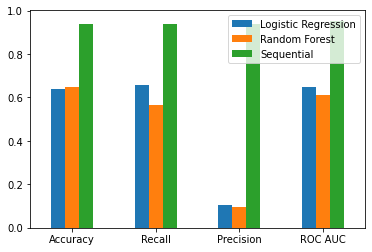

In [127]:
df = pd.DataFrame({'Logistic Regression': LR_scores.values(),
                   'Random Forest': RF_scores.values(),
                   'Sequential': test_scores},
                  index=LR_scores.keys())
df.plot.bar(rot=0)



We received in the "Sequential" model the highest score in each of the evaluation methods.

In the "Logistic Regression" and the "Random Forest" models:
 
The "Precision" score is very low i.e small chance of being sick\dead provided the prediction is positive.

However, the "Recall" scores are larger i.e larger chance the prediction is positive provided being sick\dead.

The "ROC AUC" scores are larger i.e large "Sensitivity" and large Specificity (small (1-Specificity) ).

"Sensitivity" - The test is positive provided the patient has a disease.

"Specificity" - The test is negative provided the patient does not has a disease.

Although the accuracy is high in all of the models, it is not a good enough measure for the above dataset because the data is unbalanced(more false than true in the target column). For example, if we determine that the prediction is always "false", we will usually be right, so the accuracy will be high, even though we missed important illness/death cases.

In our opinion, the most important evaluation method for this dataset is "Recall" because we want to get positive predictions provided the patient has a disease. Therefore, for each model, we chose parameters that increase this score.
